In [66]:
%matplotlib notebook

In [67]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Make sure the pyodine package can be found.
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Reimport the package on every evaluation of this cell
import importlib
import pyodine.controller.feature_locator
pyodine.controller.feature_locator = importlib.reload(pyodine.controller.feature_locator)

In [68]:
loc = pyodine.controller.feature_locator.FeatureLocator()
ref = np.fromfile('../../data/Analytic Spectrum (KD)_100kHz.bin')
loc.reference, loc.ref_span = ref, 1000  # approx. 1000 MHz of reference span

In [69]:
for r in np.nditer(loc.reference, op_flags=['readwrite']):
    if abs(r) < 0.01:
        r[...] = 0

# Emulate low-frequency sampling of one feature.
sample = loc.reference[3950:4950]
low_res_sample = sample[::5]

# Add noise.
loc.reference = np.add(loc.reference, np.random.normal(0, .1, len(loc.reference)))
sample = np.add(sample, np.random.normal(0, .1, len(sample)))

In [70]:
loc.locate_sample(np.array([range(len(low_res_sample)), low_res_sample]), 16.64 * 5)  # Sample spans approx. 16.7 MHz.

[  94.65226499   94.3274504     9.87008077  258.85801385  339.98102037
   90.05354217   92.58641905   93.22557705   10.83173867    9.77489327]
5.71837287836e-11


[[329.13923839680024, 0.98024450103572358, 0.5857334446693373],
 [567.8693442213148, 0.73073690101913402, 0.43664314538739296],
 [307.89100908257643, 0.73016623603720532, 0.43630215131370614],
 [91.242396466961083, 0.72951727103201314, 0.43591436999225075],
 [470.37746854428798, 0.72284184968875798, 0.43192555135172506],
 [806.18281809849179, 0.72055643888733001, 0.43055993130510356],
 [350.30414132155653, 0.67323918943922489, 0.4022860715872138],
 [69.910840763269732, 0.52328569423911586, 0.31268314375547085],
 [457.87851012415632, 0.5215741746154765, 0.31166044555750672],
 [784.85126239480041, 0.51615488275629651, 0.30842221215248167],
 [696.19198400133325, 0.51413788676781524, 0.30721698018538662],
 [701.19156736938589, 0.51271526683539048, 0.30636691056235488],
 [546.53778851762354, 0.49529991790318567, 0.29596057590870395],
 [449.04591284059666, 0.37718596191756193, 0.22538298610342272],
 [425.38121823181405, 0.37397895639520656, 0.22346667809078094],
 [438.71344054662109, 0.36929

<IPython.core.display.Javascript object>


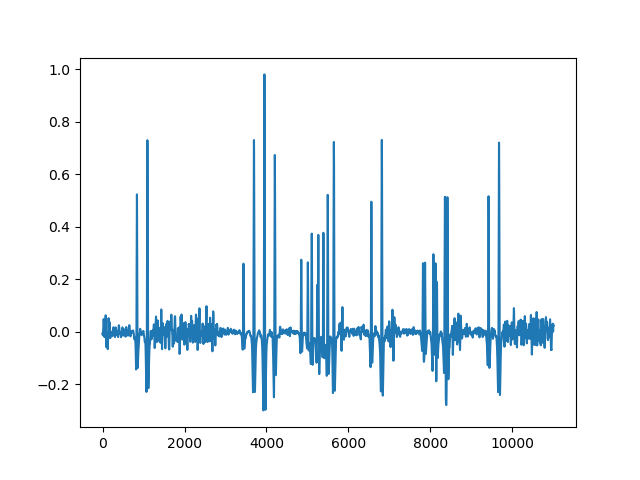

In [71]:
plt.plot(loc.correlate())